<a href="https://colab.research.google.com/github/YangHyunu/Signiture/blob/main/%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98_nn_11_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NN 이진분류

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

SEED=123

time: 1.3 ms (started: 2024-07-07 12:24:52 +00:00)


In [50]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10.9 s (started: 2024-07-07 12:24:53 +00:00)


## 데이터 준비
  - 당뇨병 데이터 <당뇨병 유무 예측>

In [51]:
! wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv

--2024-07-07 12:25:04--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv.1’

diabetes.csv.1      100%[===================>]  23.31K  --.-KB/s    in 0.002s  

2024-07-07 12:25:04 (14.9 MB/s) - ‘diabetes.csv.1’ saved [23873/23873]

time: 211 ms (started: 2024-07-07 12:25:04 +00:00)


In [52]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


time: 71.5 ms (started: 2024-07-07 12:25:04 +00:00)


In [53]:
df = diabetes.copy()

time: 1.26 ms (started: 2024-07-07 12:25:04 +00:00)


In [54]:
df.shape

(768, 9)

time: 7.77 ms (started: 2024-07-07 12:25:04 +00:00)


In [55]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

time: 4.27 ms (started: 2024-07-07 12:25:04 +00:00)


In [56]:
df.info() # Outcome 이미 인코딩 돼어있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
time: 15.3 ms (started: 2024-07-07 12:25:04 +00:00)


In [57]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

time: 7.6 ms (started: 2024-07-07 12:25:04 +00:00)


  - 혈압, 혈관두께, 인슐린, BMI의 최솟값이 0 이라는게 비 상식 전처리 필요 !

In [58]:
df.describe() # 혈압, 혈관두께, 인슐린, BMI의 최솟값이 0 이라는게 비 상식 전처리 필요 !

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


time: 65.2 ms (started: 2024-07-07 12:25:04 +00:00)


## 범주형 변수

In [59]:
df['Outcome'].value_counts() # 상당히 편향된 데이터

Outcome
0    500
1    268
Name: count, dtype: int64

time: 5.41 ms (started: 2024-07-07 12:25:04 +00:00)


<Axes: xlabel='Outcome', ylabel='count'>

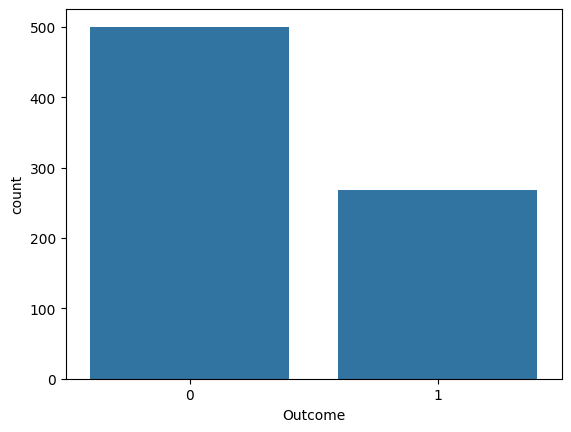

time: 497 ms (started: 2024-07-07 12:25:04 +00:00)


In [60]:
sns.countplot(data=df,x='Outcome')

## 연속형 변수

In [61]:
tmp=df['Pregnancies'].sort_values(ascending=False)
tmp= tmp.reset_index()

time: 8.22 ms (started: 2024-07-07 12:25:05 +00:00)


<Axes: xlabel='Pregnancies', ylabel='count'>

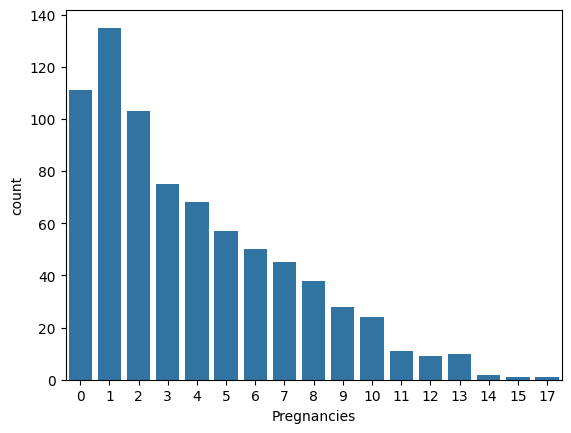

time: 875 ms (started: 2024-07-07 12:25:05 +00:00)


In [62]:
sns.countplot(data=tmp,x='Pregnancies')

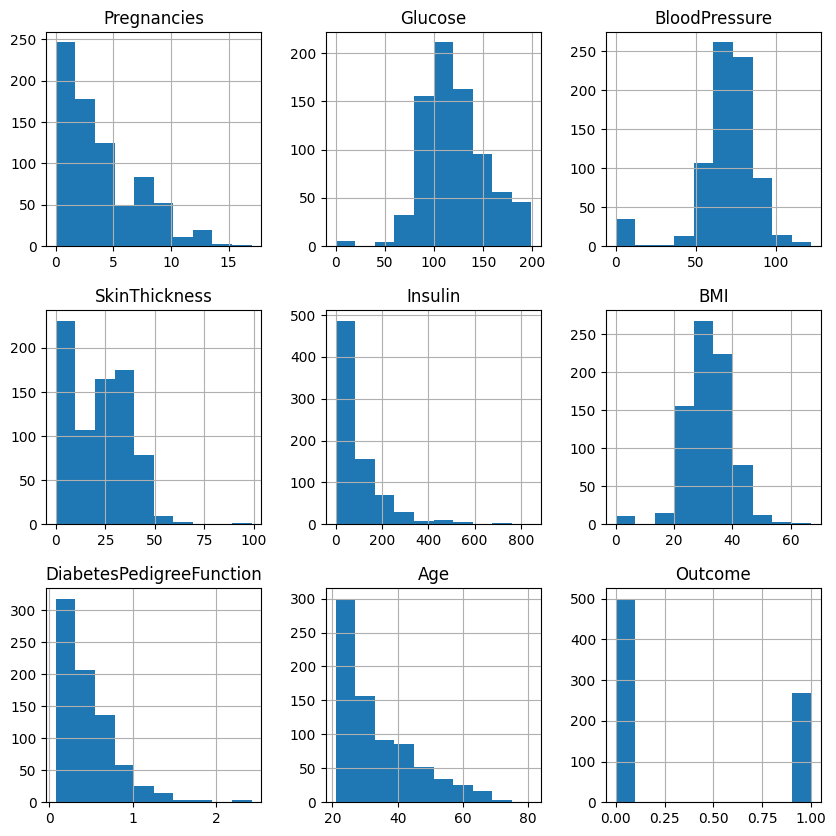

time: 2.4 s (started: 2024-07-07 12:25:06 +00:00)


In [63]:
df.hist(figsize=(10,10))
plt.show()

In [64]:
## 중복값

time: 473 µs (started: 2024-07-07 12:25:08 +00:00)


In [65]:
df.duplicated().sum()

0

time: 9.68 ms (started: 2024-07-07 12:25:08 +00:00)


  - 이상치 ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] 이상치 전 처리는 데이터 분리 이후에.

In [66]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


time: 124 ms (started: 2024-07-07 12:25:08 +00:00)


## 트레인, 테스트 데이터 분리
  - starify= df['target']으로 설정하여 데이터가 치우치지 않도록 스플릿 함

In [67]:
from sklearn.model_selection import train_test_split
train,test =train_test_split(df,test_size=0.2,shuffle=True,random_state=SEED,stratify=df['Outcome'])
train.shape, test.shape

((614, 9), (154, 9))

time: 12.7 ms (started: 2024-07-07 12:25:09 +00:00)


In [68]:
train['Outcome'].value_counts()

Outcome
0    400
1    214
Name: count, dtype: int64

time: 9.44 ms (started: 2024-07-07 12:25:09 +00:00)


In [69]:
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89,62,0,0,22.5,0.142,33,0
47,2,71,70,27,0,28.0,0.586,22,0
497,2,81,72,15,76,30.1,0.547,25,0
456,1,135,54,0,0,26.7,0.687,62,0
61,8,133,72,0,0,32.9,0.270,39,1


time: 55.1 ms (started: 2024-07-07 12:25:09 +00:00)


### X,y 변수 분리

In [70]:
X_train=train.drop('Outcome',axis=1)
y_train=train['Outcome']
X_train.shape, y_train.shape

((614, 8), (614,))

time: 23.9 ms (started: 2024-07-07 12:25:09 +00:00)


  - 오버샘플링<SMOTE> 사용 , Outcome의 균형을 맞추기 위해

In [71]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=SEED)
X_train, y_train = smote.fit_resample(X_train,y_train)

time: 35.3 ms (started: 2024-07-07 12:25:09 +00:00)


In [72]:
X_train.shape, y_train.shape # 오버샘플링을 했기 때문에 데이터의 수가 증가

((800, 8), (800,))

time: 15.8 ms (started: 2024-07-07 12:25:09 +00:00)


#  이상치 0인값을 특정값(중위값)으로 치환하기
 ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [73]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

time: 20 ms (started: 2024-07-07 12:25:09 +00:00)


In [74]:
median_list=[]
col_list=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for col in col_list:
  med = X_train[col].median()
  X_train.loc[X_train[col]==0,col] = med
  median_list.append(med)

time: 27.7 ms (started: 2024-07-07 12:25:09 +00:00)


In [75]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,4.017500,127.586250,73.045000,27.708750,83.621250,33.173320,0.486150,33.938750
std,3.396559,31.836096,11.703277,9.206648,124.497942,6.829189,0.332436,11.557117
min,0.000000,44.000000,30.000000,4.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,103.000000,66.000000,23.000000,0.000000,28.575000,0.253750,25.000000
50%,3.000000,124.000000,72.000000,23.000000,0.000000,32.669193,0.391000,30.500000
75%,6.250000,150.000000,80.000000,33.000000,133.250000,37.066362,0.647000,41.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,81.000000


time: 172 ms (started: 2024-07-07 12:25:09 +00:00)


In [76]:
X_train.shape

(800, 8)

time: 5.33 ms (started: 2024-07-07 12:25:09 +00:00)


## 스케일링

In [77]:
from sklearn.preprocessing import RobustScaler
rs= RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_train_s

y_train_e=y_train.to_numpy()

time: 27.4 ms (started: 2024-07-07 12:25:09 +00:00)


## 모델학습
  - 이진 분류

In [78]:
X_train_s.shape

(800, 8)

time: 4.3 ms (started: 2024-07-07 12:25:09 +00:00)


In [79]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=32,activation='relu',input_shape=(8,)),
    layers.Dense(units=16,activation='relu'),
    layers.Dense(units=8,activation='relu'),
    layers.Dense(units=1,activation='sigmoid'), # 이진분류이기 때문에 sigmoid를 활성화 함수로 사용됨.


])

time: 167 ms (started: 2024-07-07 12:25:09 +00:00)


In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                288       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 61.7 ms (started: 2024-07-07 12:25:10 +00:00)


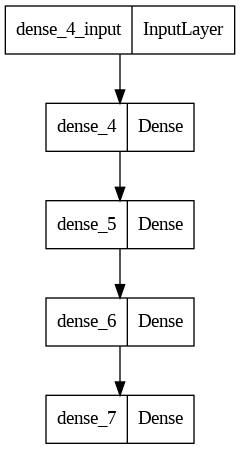

time: 197 ms (started: 2024-07-07 12:25:10 +00:00)


In [81]:
from keras import utils
utils.plot_model(model)

In [82]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

time: 43.1 ms (started: 2024-07-07 12:25:10 +00:00)


In [83]:
EPOCHS=100
BATCH_SIZE=32
history= model.fit(X_train_s,y_train_e,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2
          )

Epoch 1/100
20/20 [==============================] - 3s 34ms/step - loss: 0.7066 - accuracy: 0.4422 - val_loss: 0.5459 - val_accuracy: 0.9500
Epoch 2/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6765 - accuracy: 0.6141 - val_loss: 0.5774 - val_accuracy: 0.8000
Epoch 3/100
20/20 [==============================] - 0s 8ms/step - loss: 0.6632 - accuracy: 0.6766 - val_loss: 0.5708 - val_accuracy: 0.7625
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.6498 - accuracy: 0.7125 - val_loss: 0.5617 - val_accuracy: 0.7250
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.6339 - accuracy: 0.7484 - val_loss: 0.5594 - val_accuracy: 0.6938
Epoch 6/100
20/20 [==============================] - 0s 14ms/step - loss: 0.6164 - accuracy: 0.7500 - val_loss: 0.5443 - val_accuracy: 0.6812
Epoch 7/100
20/20 [==============================] - 0s 14ms/step - loss: 0.5951 - accuracy: 0.7500 - val_loss: 0.5480 - val_accuracy: 0.6500
Epoch 8

## 학습과정 시각화

In [84]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()


time: 1.72 ms (started: 2024-07-07 12:25:53 +00:00)


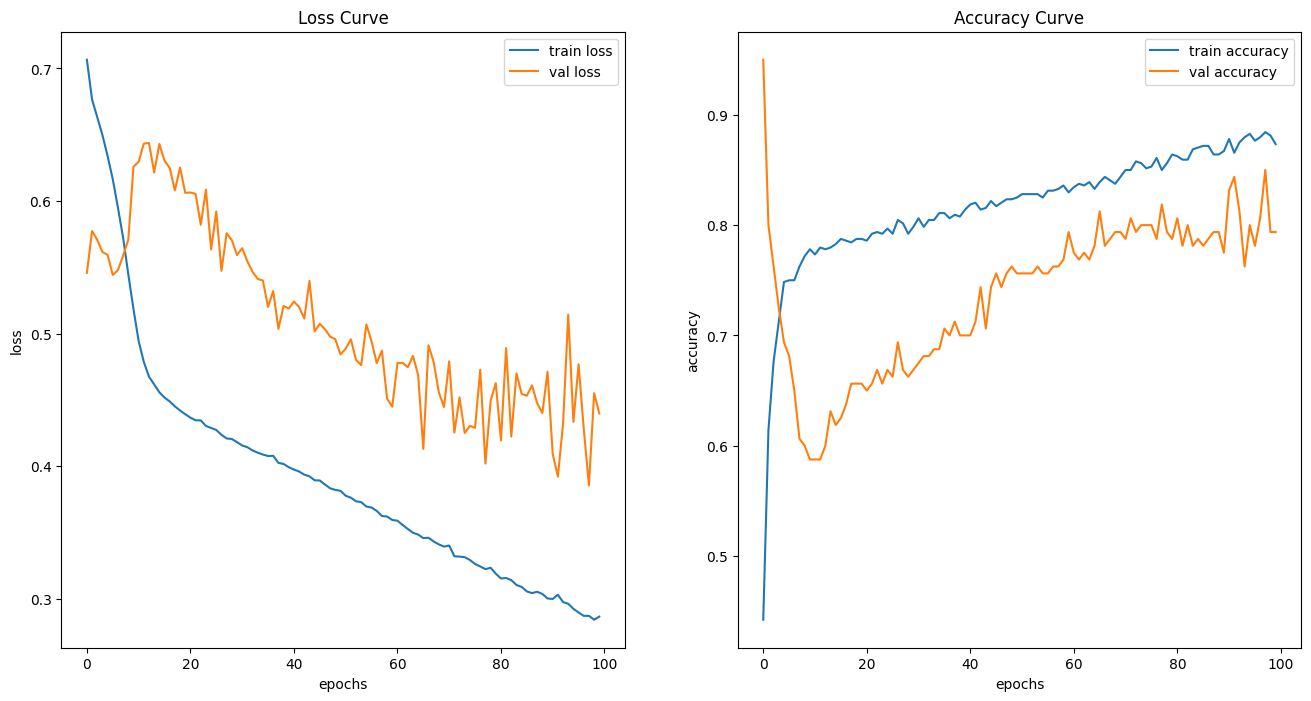

time: 543 ms (started: 2024-07-07 12:25:53 +00:00)


In [85]:
plot_history(history)

# 모델 평가
- 테스트 데이터는 원래 데이터의 분포를 유지해야 하기 때문에 오버샘플링 X

In [86]:
X_test = test.drop('Outcome',axis=1)
y_test = test['Outcome']
X_test.shape,y_test.shape

((154, 8), (154,))

time: 15.7 ms (started: 2024-07-07 12:25:54 +00:00)


In [87]:
col_list=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for i, col in enumerate(col_list):
  X_test.loc[X_test[col]==0,col] = median_list[i]
  median_list.append(med)


time: 5.21 ms (started: 2024-07-07 12:25:54 +00:00)


In [88]:
X_test_s =rs.fit_transform(X_test)
X_test_s
y_test_e = y_test.to_numpy()

time: 15.1 ms (started: 2024-07-07 12:25:54 +00:00)


In [89]:
y_pred = model.predict(X_test_s)

5/5 [==============================] - 0s 3ms/step
time: 214 ms (started: 2024-07-07 12:25:54 +00:00)


In [90]:
y_pred
y_pred=(y_pred>0.5).astype(int).reshape(-1)
# (y_pred>0.5).astype(int).shape


time: 1.12 ms (started: 2024-07-07 12:25:54 +00:00)


In [91]:
y_test_e

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

time: 6.37 ms (started: 2024-07-07 12:25:54 +00:00)


In [92]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='binary'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Actual',ylabel='Prediction')
  plt.show()

time: 1.11 ms (started: 2024-07-07 12:25:54 +00:00)


accuracy 0.7662337662337663
recall 0.7222222222222222
precision 0.65
f1_score 0.6842105263157895


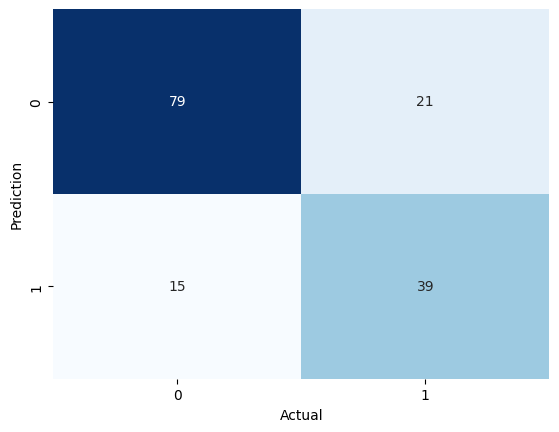

time: 171 ms (started: 2024-07-07 12:25:54 +00:00)


In [93]:
print_metrics(y_test_e,y_pred)

## 결론
  - 오버샘플링 이후 성능 지표가 향상되었으나 큰 차이는 없었다..